In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# !rm -r /content/drive/MyDrive/data/Data

# !unzip /content/drive/MyDrive/data/Data.zip -d /content/drive/MyDrive/data

Mounted at /content/drive


In [ ]:
import os
import copy
import torch

use_gpu = torch.cuda.is_available()
if use_gpu:
    print("Using CUDA")

Using CUDA


# Data Preprocessing

In [ ]:
import os
import shutil

def concatenate_folders(train_folder, test_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Define subfolders
    subfolders = ['DME', 'DRUSEN']

    for subfolder in subfolders:
        # Create subfolders in the output folder if they don't exist
        output_subfolder = os.path.join(output_folder, subfolder)
        if not os.path.exists(output_subfolder):
            os.makedirs(output_subfolder)

        # Copy files from train set subfolder to output subfolder
        train_subfolder = os.path.join(train_folder, subfolder)
        for filename in os.listdir(train_subfolder):
            src_file = os.path.join(train_subfolder, filename)
            dst_file = os.path.join(output_subfolder, filename)
            shutil.copy(src_file, dst_file)

        # Copy files from test set subfolder to output subfolder
        test_subfolder = os.path.join(test_folder, subfolder)
        for filename in os.listdir(test_subfolder):
            src_file = os.path.join(test_subfolder, filename)
            dst_file = os.path.join(output_subfolder, filename)
            shutil.copy(src_file, dst_file)

# Example usage
train_folder = '/content/drive/MyDrive/Data/train'
test_folder = '/content/drive/MyDrive/Data/test'
val_folder = '/content/drive/MyDrive/Data/val'
output_folder1 = '/content/drive/MyDrive/Data/train1'
output_folder = '/content/drive/MyDrive/SRGAN/data/train'

concatenate_folders(train_folder, test_folder, output_folder1)
concatenate_folders(output_folder1, val_folder, output_folder)

print(f"Train, val and test sets have been concatenated into {output_folder}.")


Train, val and test sets have been concatenated into /content/drive/MyDrive/SRGAN/data/train.


In [ ]:
import os
import shutil
import random

def split_train_val(train_folder, val_folder, val_ratio=0.08):
    # Create validation folder if it doesn't exist
    if not os.path.exists(val_folder):
        os.makedirs(val_folder)

    # Get subdirectories in the train folder
    subdirs = [d for d in os.listdir(train_folder) if os.path.isdir(os.path.join(train_folder, d))]

    for subdir in subdirs:
        # Create corresponding subdirectory in the validation folder
        val_subdir = os.path.join(val_folder, subdir)
        if not os.path.exists(val_subdir):
            os.makedirs(val_subdir)

        # Get list of images in the current subdirectory
        images = [f for f in os.listdir(os.path.join(train_folder, subdir)) if os.path.isfile(os.path.join(train_folder, subdir, f))]

        # Shuffle the images
        random.shuffle(images)

        # Calculate the number of validation images
        num_val_images = int(len(images) * val_ratio)

        # Move the validation images to the validation folder
        for i in range(num_val_images):
            src = os.path.join(train_folder, subdir, images[i])
            dst = os.path.join(val_subdir, images[i])
            shutil.move(src, dst)

# Path to the folder containing your training images
train_folder = "/content/drive/MyDrive/SRGAN/data/train"

# Path to the folder where you want to save the validation images
val_folder = "/content/drive/MyDrive/SRGAN/data/test"

# Split the train folder into train and validation folders with equal amount of images from each subdirectory
split_train_val(train_folder, val_folder, val_ratio=0.3)

# Print a success message
print("The train folder was successfully split into train and test folders with equal amount of images from each subdirectory.")



The train folder was successfully split into train and test folders with equal amount of images from each subdirectory.


In [ ]:
import os
from PIL import Image

def resize_images(input_folder, output_folder, size=(32, 32)):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Define subfolders
    subfolders = ['DME', 'DRUSEN']

    for subfolder in subfolders:
        input_subfolder = os.path.join(input_folder, subfolder)
        output_subfolder = os.path.join(output_folder, subfolder)

        # Create subfolders in the output folder if they don't exist
        if not os.path.exists(output_subfolder):
            os.makedirs(output_subfolder)

        for filename in os.listdir(input_subfolder):
            input_file = os.path.join(input_subfolder, filename)
            output_file = os.path.join(output_subfolder, filename)

            # Open an image file
            with Image.open(input_file) as img:
                # Resize image
                img_resized = img.resize(size, Image.LANCZOS)
                # Save it back to disk
                img_resized.save(output_file)

# Example usage
input_folder = '/content/drive/MyDrive/SRGAN/data/train'
output_folder = '/content/drive/MyDrive/SRGAN/data/train_LR'

resize_images(input_folder, output_folder)

print(f"Images have been resized and saved to {output_folder}.")


Images have been resized and saved to /content/drive/MyDrive/SRGAN/data/train_LR.


In [ ]:
import os
from PIL import Image

def resize_images(input_folder, output_folder, size=(128, 128)):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Define subfolders
    subfolders = ['DME', 'DRUSEN']

    for subfolder in subfolders:
        input_subfolder = os.path.join(input_folder, subfolder)
        output_subfolder = os.path.join(output_folder, subfolder)

        # Create subfolders in the output folder if they don't exist
        if not os.path.exists(output_subfolder):
            os.makedirs(output_subfolder)

        for filename in os.listdir(input_subfolder):
            input_file = os.path.join(input_subfolder, filename)
            output_file = os.path.join(output_subfolder, filename)

            # Open an image file
            with Image.open(input_file) as img:
                # Resize image
                img_resized = img.resize(size, Image.LANCZOS)
                # Save it back to disk
                img_resized.save(output_file)

# Example usage
input_folder = '/content/drive/MyDrive/SRGAN/data/train'
output_folder = '/content/drive/MyDrive/SRGAN/data/train_HR'

resize_images(input_folder, output_folder)

print(f"Images have been resized and saved to {output_folder}.")


Images have been resized and saved to /content/drive/MyDrive/SRGAN/data/train_HR.


In [ ]:
import os
from PIL import Image

def resize_images(input_folder, output_folder, size=(128, 128)):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Define subfolders
    subfolders = ['DME', 'DRUSEN']

    for subfolder in subfolders:
        input_subfolder = os.path.join(input_folder, subfolder)
        output_subfolder = os.path.join(output_folder, subfolder)

        # Create subfolders in the output folder if they don't exist
        if not os.path.exists(output_subfolder):
            os.makedirs(output_subfolder)

        for filename in os.listdir(input_subfolder):
            input_file = os.path.join(input_subfolder, filename)
            output_file = os.path.join(output_subfolder, filename)

            # Open an image file
            with Image.open(input_file) as img:
                # Resize image
                img_resized = img.resize(size, Image.LANCZOS)
                # Save it back to disk
                img_resized.save(output_file)

# Example usage
input_folder = '/content/drive/MyDrive/SRGAN/data/test'
output_folder = '/content/drive/MyDrive/SRGAN/data/test_HR'

resize_images(input_folder, output_folder)

print(f"Images have been resized and saved to {output_folder}.")


Images have been resized and saved to /content/drive/MyDrive/SRGAN/data/test_HR.


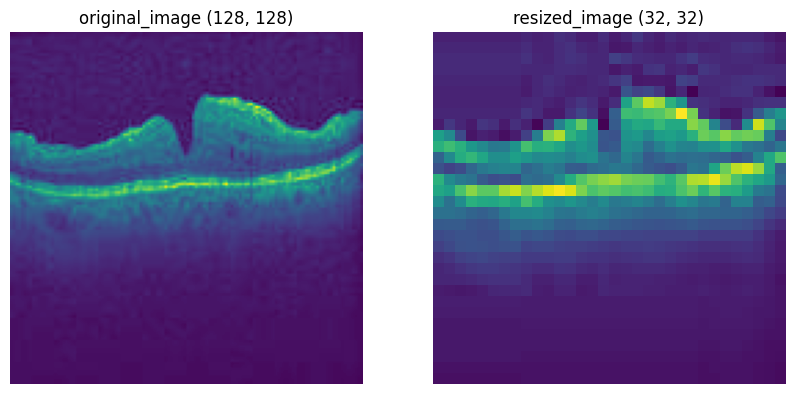

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def display_images_with_size(original_image_path, resized_image_path, name1, name2):
    # Open the original and resized images
    original_image = Image.open(original_image_path)
    resized_image = Image.open(resized_image_path)

    # Get the size of the images
    original_size = original_image.size
    resized_size = resized_image.size

    # Display the images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(original_image)
    axes[0].set_title(f'{name1} {original_size}')
    axes[0].axis('off')

    axes[1].imshow(resized_image)
    axes[1].set_title(f'{name2} {resized_size}')
    axes[1].axis('off')

    # plt.show()

# Example usage
original_image_path = '/content/drive/MyDrive/SRGAN/data/train_HR/DME/DME-1072015-3.jpeg'
resized_image_path = '/content/drive/MyDrive/SRGAN/data/train_LR/DME/DME-1072015-3.jpeg'

display_images_with_size(original_image_path, resized_image_path, "original_image", "resized_image")


In [ ]:
import os
import shutil

def concatenate_subfolders(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Define subfolders to concatenate
    subfolders = ['DME', 'DRUSEN']

    for subfolder in subfolders:
        input_subfolder = os.path.join(input_folder, subfolder)

        for filename in os.listdir(input_subfolder):
            src_file = os.path.join(input_subfolder, filename)
            dst_file = os.path.join(output_folder, filename)
            shutil.copy(src_file, dst_file)

# Example usage
input_folder = '/content/drive/MyDrive/SRGAN/data/train_LR'
output_folder = '/content/drive/MyDrive/SRGAN/data/train_LR/concatenated'

concatenate_subfolders(input_folder, output_folder)

print(f"Subfolders have been concatenated into {output_folder}.")

Subfolders have been concatenated into /content/drive/MyDrive/SRGAN/data/train_LR/concatenated.


In [ ]:
import os
import shutil

def concatenate_subfolders(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Define subfolders to concatenate
    subfolders = ['DME', 'DRUSEN']

    for subfolder in subfolders:
        input_subfolder = os.path.join(input_folder, subfolder)

        for filename in os.listdir(input_subfolder):
            src_file = os.path.join(input_subfolder, filename)
            dst_file = os.path.join(output_folder, filename)
            shutil.copy(src_file, dst_file)

# Example usage
input_folder = '/content/drive/MyDrive/SRGAN/data/train_HR'
output_folder = '/content/drive/MyDrive/SRGAN/data/train_HR/concatenated'

concatenate_subfolders(input_folder, output_folder)

print(f"Subfolders have been concatenated into {output_folder}.")


Subfolders have been concatenated into /content/drive/MyDrive/SRGAN/data/train_HR/concatenated.


# SRGAN

In [ ]:
!git clone https://github.com/AarohiSingla/SRGAN_CustomDataset.git
%cd SRGAN_CustomDataset

In [ ]:
%cd /content/drive/MyDrive/SRGAN

/content/drive/MyDrive/SRGAN


In [ ]:
!python main.py --LR_path /content/drive/MyDrive/SRGAN/data/train_LR/concatenated --GT_path /content/drive/MyDrive/SRGAN/data/train_HR/concatenated

2
0.01246490329504013
4
0.007048711180686951
6
0.007438624277710915
8
0.006940996274352074
10
0.006132657174021006
12
0.00980472657829523
14
0.008313093334436417
16
0.007844102568924427
18
0.007271857000887394
20
0.004879309330135584
22
0.00832506362348795
24
0.00495661748573184
26
0.007334414403885603
28
0.005624637473374605
30
0.00686560058966279
32
0.005431954748928547
34
0.006297830492258072
36
0.0058900415897369385
38
0.007189939264208078
40
0.007597604300826788
42
0.006139800418168306
44
0.005037710070610046
46
0.007482229266315699
48
0.005012300796806812
50
0.005385193042457104
52
0.004944303072988987
54
0.004211504943668842
56
0.010511367581784725
58
0.008950518444180489
60
0.0062880790792405605
62
0.005032250192016363
64
0.005315766669809818
66
0.004961904603987932
68
0.005389207974076271
70
0.005081746261566877
72
0.00735462224110961
74
0.007562792859971523
76
0.00478749256581068
78
0.005026563070714474
80
0.005244940519332886
82
0.005253279581665993
84
0.005693201906979084
8

In [ ]:
!python main.py --mode test_only --LR_path /content/drive/MyDrive/SRGAN/data/train_LR/concatenated --generator_path /content/drive/MyDrive/SRGAN/model/pre_trained_model_150.pt

/content/drive/MyDrive/SRGAN/mode.py:195: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator.load_state_dict(torch.load(args.generator_path))


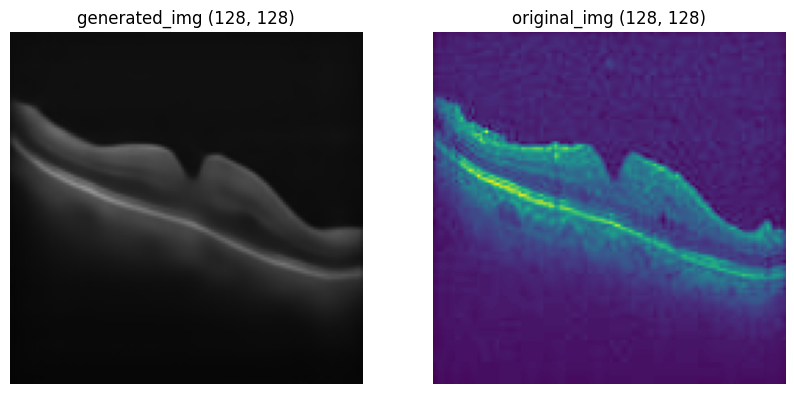

In [ ]:
# Example usage
generated_img = '/content/drive/MyDrive/SRGAN/result/DME-1072015-2.jpeg.png'
original_img = '/content/drive/MyDrive/SRGAN/data/train_HR/concatenated/DME-1072015-2.jpeg'

display_images_with_size(generated_img, original_img, "generated_img", "original_img")